In [1]:
import sys
sys.path.append('../')

from helpers.plotting import *

### Impersonation rate improvement. Is our procedure good at optimizing? 

In [2]:
mv_sets = ['resnet34_v000_pgd_spec_f/v000/', 'resnet50_v000_pgd_spec_f/v000/', 'resnet50_v000_pgd_spec_m/v000/',
           'thin_resnet_v000_pgd_spec_f/v000/', 'thin_resnet_v000_pgd_spec_m/v000/', 'vggvox_v000_pgd_spec_f/v000/',
           'vggvox_v000_pgd_spec_m/v000/', 'vggvox_v000_pgd_wave_f/v000/', 'vggvox_v000_pgd_wave_m/v000/']

In [17]:
target_pop = 'mv_test_population_interspeech_1000u_10s'
target_asv = 'vggvox_v000'
policy = 'any'
imp_rate_change('resnet50_v000_pgd_spec_f/v000/', target_pop, target_asv, policy)

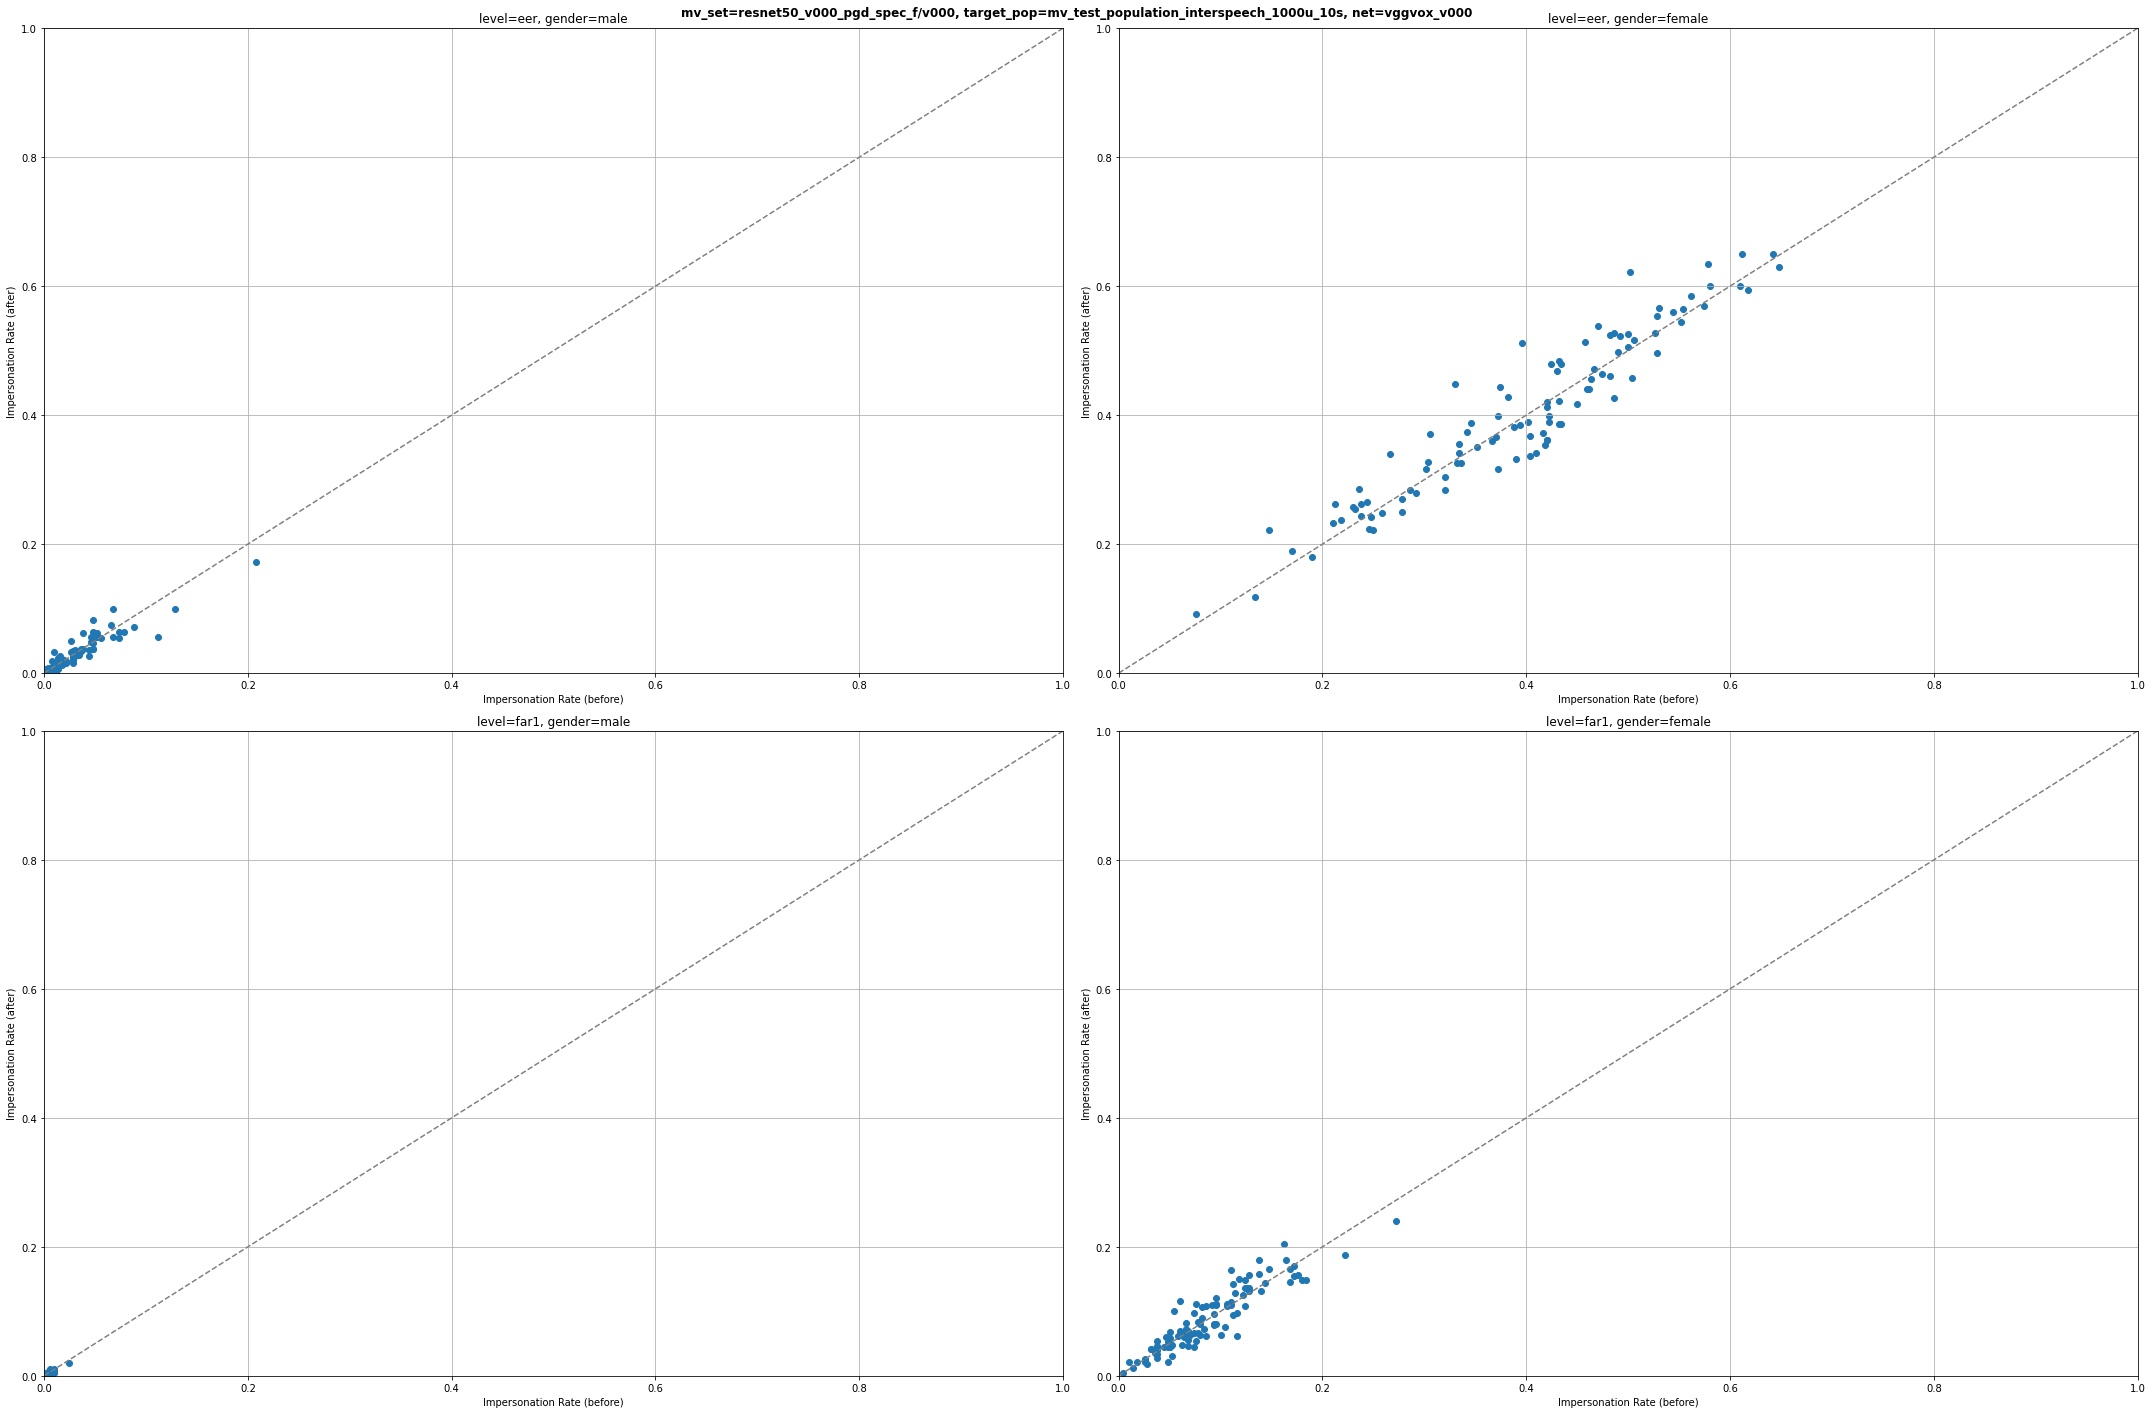

In [19]:
target_pop = 'mv_test_population_interspeech_1000u_10s'
target_asv = 'vggvox_v000'
policy = 'any'
imp_rate_scatter('resnet50_v000_pgd_spec_f/v000', target_pop, target_asv, policy)

### Cross-system attacks. Can the attack transfer to unseen speaker verifiers?

In [20]:
source_mvs = mv_sets.copy()
target_pop = 'mv_test_population_interspeech_1000u_10s'
target_gender = 'female'
cross_asv_table(source_mvs, target_pop, 'any', 'far1', target_gender)

test_pop=mv_test_population_interspeech_1000u_10s, policy=any, level=far1, gender=female


,resnet34_v000,resnet50_v000,thin_resnet_v000,vggvox_v000
resnet34_v000_pgd_spec_f/v000/,"(0.16, 0.6)","(0.08, 0.08)","(0.08, 0.1)","(0.09, 0.09)"
resnet50_v000_pgd_spec_f/v000/,"(0.16, 0.16)","(0.08, 0.26)","(0.08, 0.08)","(0.09, 0.09)"
thin_resnet_v000_pgd_spec_f/v000/,"(0.16, 0.2)","(0.08, 0.08)","(0.08, 0.28)","(0.09, 0.1)"
vggvox_v000_pgd_spec_f/v000/,"(0.16, 0.16)","(0.08, 0.08)","(0.08, 0.09)","(0.09, 0.3)"
vggvox_v000_pgd_wave_f/v000/,"(0.16, 0.12)","(0.08, 0.11)","(0.08, 0.07)","(0.09, 0.77)"


### Multiple-presentation (adversarial sampling). Can the attacker leverage multiple master voices?

In [6]:
source_pop = 'mv_train_population_interspeech_1000u_50s'
target_pop = 'mv_test_population_interspeech_1000u_10s'
source_mvs = mv_sets.copy()
net = 'vggvox_v000'
gender = 'female'
max_pres = 5

In [8]:
multiple_presentation_table(source_pop, target_pop, source_mvs, net, 'avg', 'far1', gender, max_pres)

,#Pres = 1,#Pres = 2,#Pres = 3,#Pres = 4,#Pres = 5
resnet34_v000_pgd_spec_f/v000/,"(0.12, 0.12)","(0.15, 0.19)","(0.18, 0.23)","(0.24, 0.26)","(0.24, 0.29)"
resnet50_v000_pgd_spec_f/v000/,"(0.11, 0.11)","(0.16, 0.17)","(0.18, 0.21)","(0.22, 0.26)","(0.24, 0.27)"
thin_resnet_v000_pgd_spec_f/v000/,"(0.13, 0.13)","(0.18, 0.19)","(0.23, 0.23)","(0.26, 0.26)","(0.26, 0.29)"
vggvox_v000_pgd_spec_f/v000/,"(0.29, 0.29)","(0.33, 0.37)","(0.35, 0.4)","(0.36, 0.41)","(0.37, 0.43)"
vggvox_v000_pgd_wave_f/v000/,"(0.43, 0.43)","(0.43, 0.44)","(0.44, 0.44)","(0.44, 0.44)","(0.44, 0.44)"


###  Do we generalize against other instances of the same architecture?

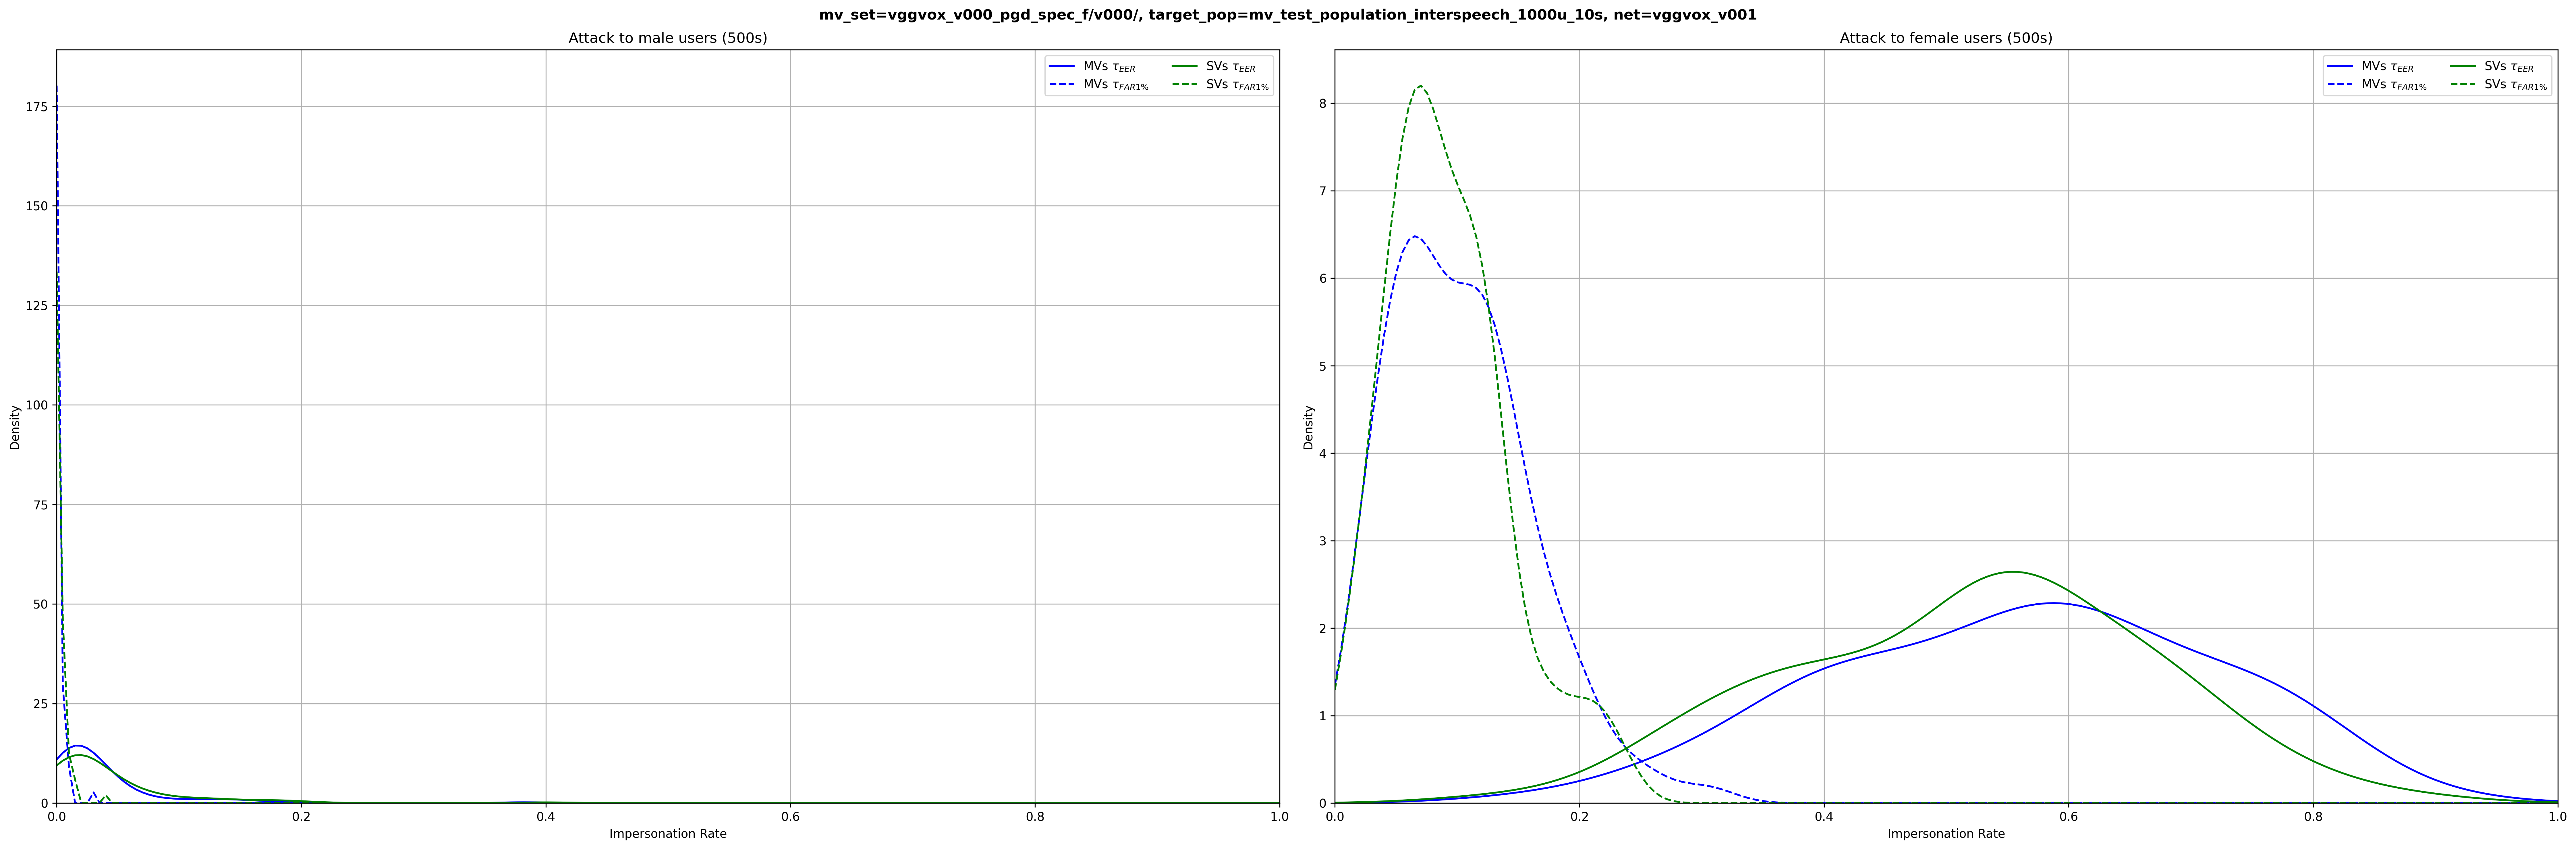

In [49]:
target_pop = 'mv_test_population_interspeech_1000u_10s'
target_asv = 'vggvox_v001'
policy = 'any'
imp_rate_change('vggvox_v000_pgd_spec_f/v000/', target_pop, target_asv, policy)

### Can the Interspeech's master voice transfer?

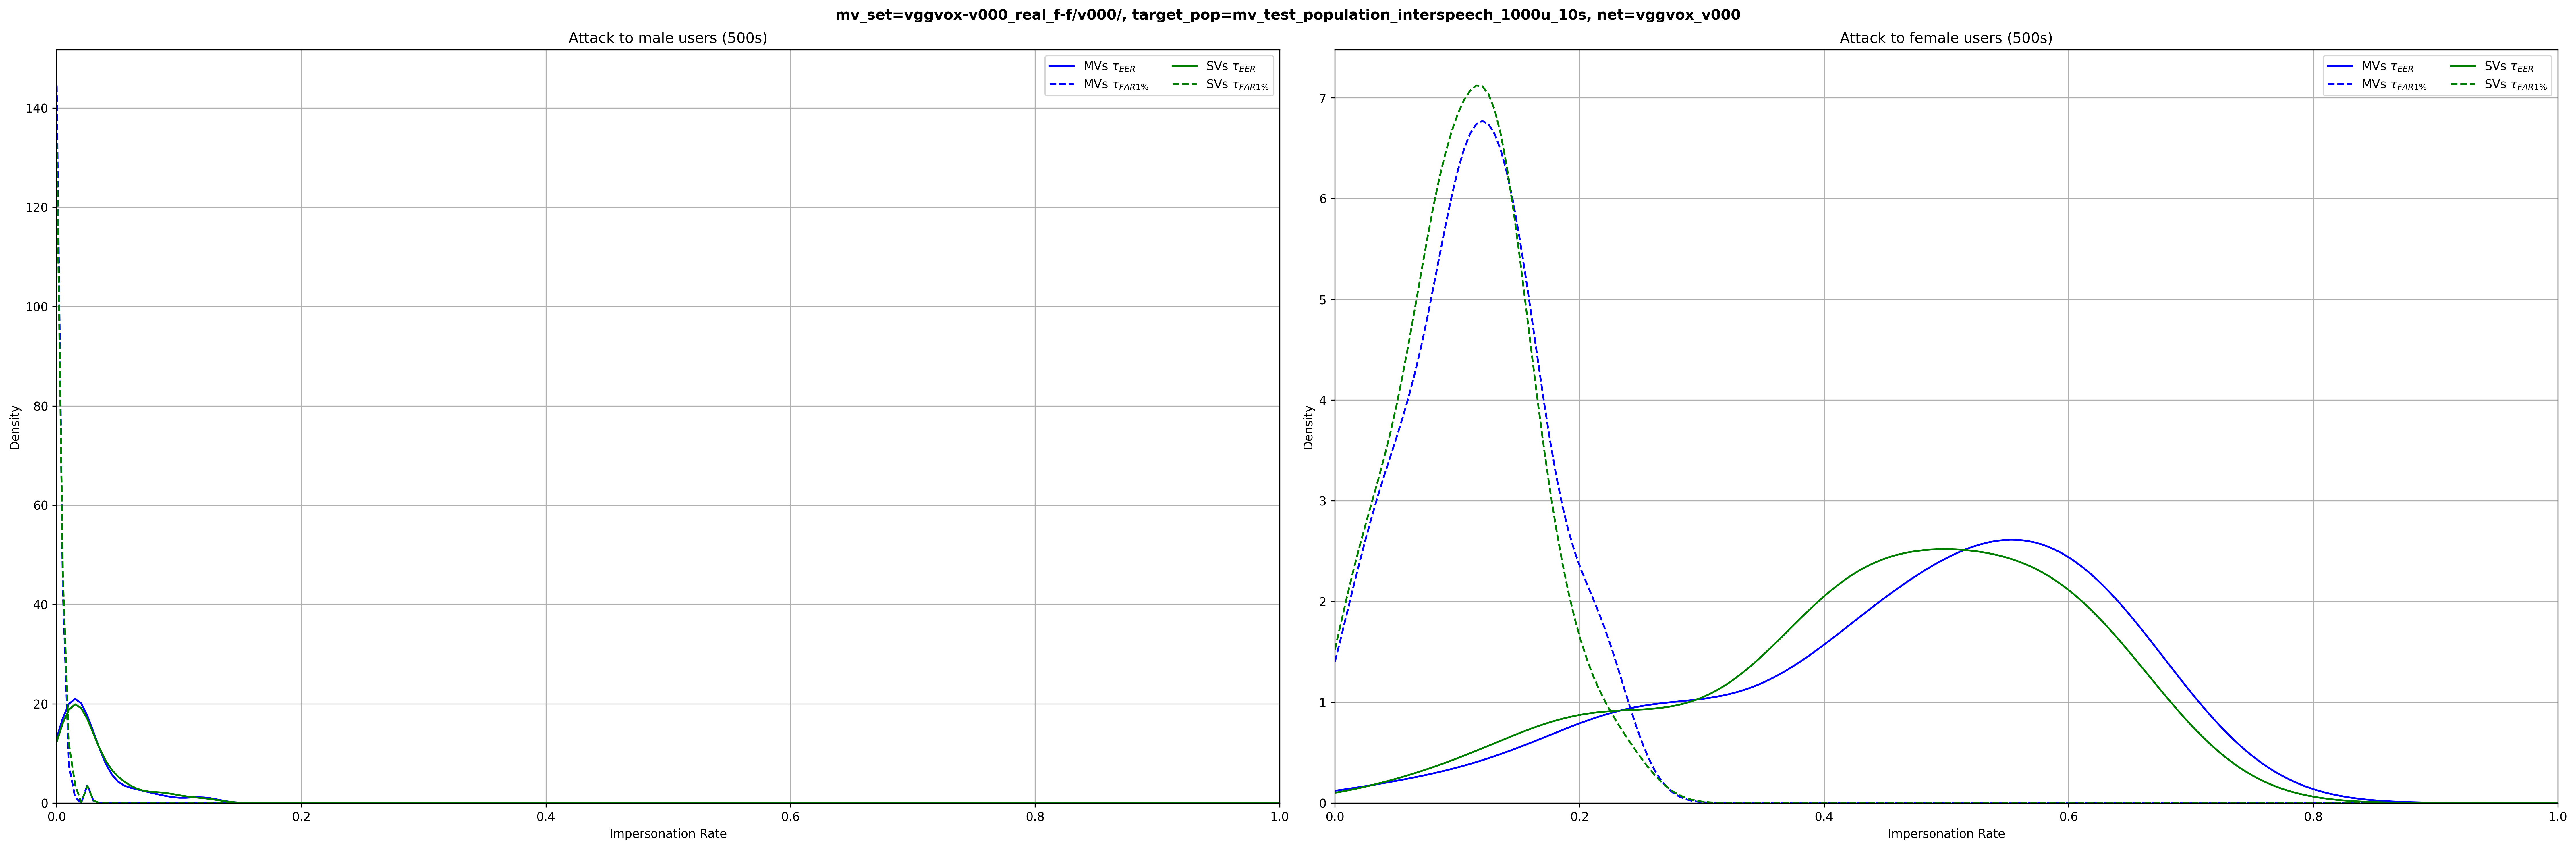

In [47]:
target_pop = 'mv_test_population_interspeech_1000u_10s'
target_asv = 'vggvox_v000'
policy = 'any'
imp_rate_change('vggvox-v000_real_f-f/v000/', target_pop, target_asv, policy)

### How do the similarity scores vary?

In [18]:
path = 'data/vs_mv_data/vggvox_v000_pgd_spec_f/v000/mv/mv_test_population_interspeech_1000u_10s-resnet34_v000-any-eer.npz'

In [30]:
mat = np.load(os.path.join('..', path), allow_pickle=True)

In [39]:
sim = mat['results'][()]['sims']

In [43]:
sim.shape

(100, 10000)

In [40]:
np.min(sim), np.max(sim), np.mean(sim), np.std(sim)

(0.4868709444999695,
 0.9491961002349854,
 0.7655636726729572,
 0.06366349366267635)

In [41]:
{"eer": 0.7683, "far1": 0.8343}

{'eer': 0.7683, 'far1': 0.8343}

### How do the epochs and learning rates impact on impersonation?